# 时间序列预测实战

In [34]:
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

In [37]:
ls

all.csv  ENZYMES/                              vintage-预授信.csv
Cora/    international-airline-passengers.csv  vintage预测-线性.ipynb


In [41]:
vintage = pd.read_csv('./vintage-预授信.csv',dtype={'pay_month':'object'},nrows=33)
vintage.columns = [col.strip() for col in vintage.columns]
vintage

,pay_month,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,201710,0.000017,0.001269,0.004156,0.007175,0.009924,0.011055,0.011774,0.012481,0.013223,...,0.014276,0.014408,0.014355,0.014203,0.014069,0.013962,0.013858,0.013752,0.013673,0.013580
1,201711,0.000063,0.002773,0.006471,0.009556,0.010935,0.011955,0.012890,0.013716,0.014513,...,0.015493,0.015541,0.015465,0.015309,0.015192,0.015054,0.014944,0.014853,0.014782,0.014715
2,201712,0.000041,0.001239,0.003059,0.004109,0.005035,0.006015,0.006997,0.007861,0.008619,...,0.009336,0.009421,0.009375,0.009267,0.009140,0.009046,0.008968,0.008888,0.008831,0.008770
3,201801,0.000035,0.001423,0.002609,0.003719,0.004887,0.006095,0.007266,0.008235,0.008943,...,0.009569,0.009721,0.009722,0.009557,0.009410,0.009323,0.009253,0.009177,0.009130,0.009089
4,201802,0.000040,0.000942,0.002189,0.003438,0.004855,0.006341,0.007588,0.008511,0.009154,...,0.009854,0.010065,0.010056,0.009939,0.009838,0.009775,0.009700,0.009642,0.009615,0.009566
5,201803,0.000022,0.000945,0.002231,0.003814,0.005521,0.006995,0.008147,0.009015,0.009517,...,0.010350,0.010484,0.010404,0.010300,0.010210,0.010149,0.010081,0.010036,0.009994,0.009950
6,201804,0.000042,0.000910,0.002404,0.004016,0.005542,0.006923,0.007998,0.008600,0.009144,...,0.009935,0.009980,0.009949,0.009856,0.009773,0.009689,0.009636,0.009593,0.009546,0.009510
7,201805,0.000025,0.001279,0.003231,0.005200,0.007198,0.008589,0.009573,0.010468,0.011371,...,0.012116,0.012308,0.012316,0.012194,0.012049,0.011974,0.011916,0.011847,0.011811,0.011764
8,201806,0.000041,0.001680,0.003893,0.005820,0.007519,0.008689,0.009853,0.010878,0.011489,...,0.012204,0.012353,0.012378,0.012240,0.012132,0.012067,0.012013,0.011965,0.011894,0.011875
9,201807,0.000050,0.002142,0.004545,0.006497,0.007937,0.009481,0.010921,0.011841,0.012324,...,0.013269,0.013455,0.013441,0.013356,0.013250,0.013181,0.013116,0.013037,0.013018,0.012972


In [42]:
sample = vintage[(vintage.pay_month>='201712')& (vintage.pay_month<='201906')].iloc[:,:14]
sample.index = sample.pay_month
sample.drop('pay_month',axis=1,inplace=True)

In [43]:
train = sample.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            train.iloc[i,j] = np.nan
train

,1,2,3,4,5,6,7,8,9,10,11,12,13
pay_month,,,,,,,,,,,,,
201712,0.000041,0.001239,0.003059,0.004109,0.005035,0.006015,0.006997,0.007861,0.008619,0.009089,0.009336,0.009421,0.009375
201801,0.000035,0.001423,0.002609,0.003719,0.004887,0.006095,0.007266,0.008235,0.008943,0.009386,0.009569,0.009721,0.009722
201802,0.000040,0.000942,0.002189,0.003438,0.004855,0.006341,0.007588,0.008511,0.009154,0.009545,0.009854,0.010065,0.010056
201803,0.000022,0.000945,0.002231,0.003814,0.005521,0.006995,0.008147,0.009015,0.009517,0.009978,0.010350,0.010484,0.010404
201804,0.000042,0.000910,0.002404,0.004016,0.005542,0.006923,0.007998,0.008600,0.009144,0.009676,0.009935,0.009980,0.009949
201805,0.000025,0.001279,0.003231,0.005200,0.007198,0.008589,0.009573,0.010468,0.011371,0.011902,0.012116,0.012308,0.012316
201806,0.000041,0.001680,0.003893,0.005820,0.007519,0.008689,0.009853,0.010878,0.011489,0.011888,0.012204,0.012353,0.012378
201807,0.000050,0.002142,0.004545,0.006497,0.007937,0.009481,0.010921,0.011841,0.012324,0.012897,0.013269,0.013455,NaN
201808,0.000029,0.002134,0.004521,0.006156,0.008111,0.009971,0.011177,0.011943,0.012774,0.013364,0.013758,NaN,NaN


In [44]:
train.to_csv('./dat_test.csv', index=False)

In [99]:
sample.to_csv('./sample_test.csv', index=False)

In [45]:
ls

all.csv       ENZYMES/                              vintage预测-线性.ipynb
Cora/         international-airline-passengers.csv
dat_test.csv  vintage-预授信.csv


# 横向预测

In [48]:
from sklearn.linear_model import LinearRegression

m = 3
for j in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12]:
    for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        if i+j > 13:
            pass
        else:
            # 横向（相同放款月份）计算上面m个月的平均迁移倍数,沿对角线方向计算填充            
            coeff = np.mean([train.iloc[-i-x][str(i+j)]/train.iloc[-i-x][str(i+j-1)] for x in range(1,m+1)]) 
            value1 = train.iloc[-i][str(i+j-1)]*coeff
            train.iloc[-i][str(i+j)] = value1 
            
var = [(train.iloc[-i][str('13')] - sample.iloc[-i][str('13')])**2 for i in range(1,13)]
variance = sum(var)
variance

0.00013550829740121954

In [ ]:
dif_h = train.copy()
for j in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12]:
    for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        if i+j > 13:
            dif_h.iloc[i,j] = (train.iloc[i,j] - sample.iloc[i,j])/sample.iloc[i,j]
        else:
            dif_h.iloc[i,j] = np.nan
dif_h

In [49]:
dif_h = train.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            dif_h.iloc[i,j] = (train.iloc[i,j] - sample.iloc[i,j])/sample.iloc[i,j]
        else:
            dif_h.iloc[i,j] = np.nan
dif_h

,1,2,3,4,5,6,7,8,9,10,11,12,13
pay_month,,,,,,,,,,,,,
201712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000921
201808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001884,-0.002994


# 纵向预测-线性拟合

In [29]:
train = sample.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            train.iloc[i,j] = np.nan

In [30]:
from sklearn.linear_model import LinearRegression

for n in [3,4,5,6]:
    for j in range(12):
        for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
            if i+j > 12:
                pass
            else:           
                # 纵向（同一账期）取前n个值，做线性拟合
                X_train = np.array([x for x in range(1,n+1)]).reshape(n,1)
                y_train = np.array([train.iloc[-i-n,i+j] for n in [x for x in range(n,0,-1)]]).reshape(n,1)
                linreg = LinearRegression()
                linreg.fit(X_train, y_train)
                y_pred = linreg.predict(np.array([[n+1]])).item()
                train.iloc[-i,i+j] = y_pred    
    var = [(train.iloc[-i,12] - sample.iloc[-i,12])**2 for i in range(1,13)]
    variance = sum(var)
    print(n,variance)

3 4.812018480473962e-05
4 6.359521406244736e-05
5 0.0001090312526535449
6 0.00016242295844293896


In [32]:
from sklearn.linear_model import LinearRegression

n = 3
for j in range(12):
    for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        if i+j > 12:
            pass
        else:           
            # 纵向（同一账期）取前n个值，做线性拟合
            X_train = np.array([x for x in range(1,n+1)]).reshape(n,1)
            y_train = np.array([train.iloc[-i-n,i+j] for n in [x for x in range(n,0,-1)]]).reshape(n,1)
            linreg = LinearRegression()
            linreg.fit(X_train, y_train)
            y_pred = linreg.predict(np.array([[n+1]])).item()
            train.iloc[-i,i+j] = y_pred    
var = [(train.iloc[-i,12] - sample.iloc[-i,12])**2 for i in range(1,13)]
variance = sum(var)
print(n,variance)

3 4.812018480473962e-05


In [33]:
dif_v = train.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            dif_v.iloc[i,j] = (train.iloc[i,j] - sample.iloc[i,j])/sample.iloc[i,j]
        else:
            dif_v.iloc[i,j] = np.nan
dif_v

,1,2,3,4,5,6,7,8,9,10,11,12,13
pay_month,,,,,,,,,,,,,
201712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039846
201808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005179,0.039037


# 综合横行和纵向预测

In [35]:
from sklearn.linear_model import LinearRegression

for m in [3,4,5,6]:
    for n in [3,4,5,6]:
        for j in range(12):

            for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
                if i+j > 12:
                    pass
                else:
                    # 横向（相同放款月份）计算上面m个月的平均迁移倍数
                    coeff = np.mean([train.iloc[-i-m,i+j]/train.iloc[-i-m,i-1+j] for m in range(1,m+1)])
                    value1 = train.iloc[-i,i-1+j]*coeff

                    # 纵向（同一账期）取前n个值，做线性拟合
                    X_train = np.array([x for x in range(1,n+1)]).reshape(n,1)
                    y_train = np.array([train.iloc[-i-n,i+j] for n in [x for x in range(n,0,-1)]]).reshape(n,1)
                    linreg = LinearRegression()
                    linreg.fit(X_train, y_train)
                    y_pred = linreg.predict(np.array([[n+1]])).item()
                    train.iloc[-i,i+j] = np.mean([value1,y_pred])        
        var = [(train.iloc[-i,12] - sample.iloc[-i,12])**2 for i in range(1,13)]
        variance = sum(var)
        print(m,n,variance)

3 3 0.0003308520205575409
3 4 0.00025313161914462785
3 5 0.00020983277932274907
3 6 0.00019201100184404043
4 3 0.00037962798600352037
4 4 0.0002990865019806702
4 5 0.00024680157923169516
4 6 0.00021808842740663864
5 3 0.00041674979179375437
5 4 0.0003366630129058214
5 5 0.0002782663389022387
5 6 0.00024118661328529096
6 3 0.00043827533178772106
6 4 0.00036232387356579685
6 5 0.00030154595765157454
6 6 0.0002587458702875418


In [36]:
from sklearn.linear_model import LinearRegression

m = 3
n = 6
for j in range(12):

    for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        if i+j > 12:
            pass
        else:
            # 横向（相同放款月份）计算上面m个月的平均迁移倍数
            coeff = np.mean([train.iloc[-i-m,i+j]/train.iloc[-i-m,i-1+j] for m in range(1,m+1)])
            value1 = train.iloc[-i,i-1+j]*coeff
            
            # 纵向（同一账期）取前n个值，做线性拟合
            X_train = np.array([x for x in range(1,n+1)]).reshape(n,1)
            y_train = np.array([train.iloc[-i-n,i+j] for n in [x for x in range(n,0,-1)]]).reshape(n,1)
            linreg = LinearRegression()
            linreg.fit(X_train, y_train)
            y_pred = linreg.predict(np.array([[n+1]])).item()
            train.iloc[-i,i+j] = np.mean([value1,y_pred])        
train

,1,2,3,4,5,6,7,8,9,10,11,12,13
pay_month,,,,,,,,,,,,,
201712,0.000041,0.001239,0.003059,0.004109,0.005035,0.006015,0.006997,0.007861,0.008619,0.009089,0.009336,0.009421,0.009375
201801,0.000035,0.001423,0.002609,0.003719,0.004887,0.006095,0.007266,0.008235,0.008943,0.009386,0.009569,0.009721,0.009722
201802,0.000040,0.000942,0.002189,0.003438,0.004855,0.006341,0.007588,0.008511,0.009154,0.009545,0.009854,0.010065,0.010056
201803,0.000022,0.000945,0.002231,0.003814,0.005521,0.006995,0.008147,0.009015,0.009517,0.009978,0.010350,0.010484,0.010404
201804,0.000042,0.000910,0.002404,0.004016,0.005542,0.006923,0.007998,0.008600,0.009144,0.009676,0.009935,0.009980,0.009949
201805,0.000025,0.001279,0.003231,0.005200,0.007198,0.008589,0.009573,0.010468,0.011371,0.011902,0.012116,0.012308,0.012316
201806,0.000041,0.001680,0.003893,0.005820,0.007519,0.008689,0.009853,0.010878,0.011489,0.011888,0.012204,0.012353,0.012378
201807,0.000050,0.002142,0.004545,0.006497,0.007937,0.009481,0.010921,0.011841,0.012324,0.012897,0.013269,0.013455,0.013109
201808,0.000029,0.002134,0.004521,0.006156,0.008111,0.009971,0.011177,0.011943,0.012774,0.013364,0.013758,0.013940,0.013779


In [37]:
dif_percent = train.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            dif_percent.iloc[i,j] = (train.iloc[i,j] - sample.iloc[i,j])/sample.iloc[i,j]
        else:
            dif_percent.iloc[i,j] = np.nan
dif_percent

,1,2,3,4,5,6,7,8,9,10,11,12,13
pay_month,,,,,,,,,,,,,
201712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024702
201808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001121,-0.016128


## 时间序列方法

### 从简单出发

每个值只与账期和时间相关。

Epoch: 200, Loss: 4.47942
Epoch: 400, Loss: 1.08885
Epoch: 600, Loss: 0.36779
Epoch: 800, Loss: 0.28764
Epoch: 1000, Loss: 0.25433
Epoch: 1200, Loss: 0.23347
Epoch: 1400, Loss: 0.21861
Epoch: 1600, Loss: 0.20726
Epoch: 1800, Loss: 0.19841
Epoch: 2000, Loss: 0.19146


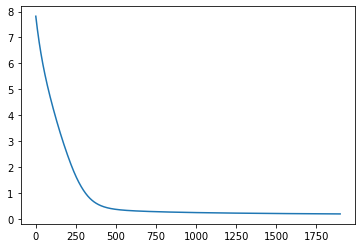

In [241]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def get_data_simple():
    dat = pd.read_csv("./dat_test.csv")
    dat = dat.to_numpy()
    return dat * 1000.0

d = get_data_simple()


def makeData(d, l=6):
    X, y = [], []
    m, n = d.shape
    for i in range(m):
        for j in range(n):
            if ~np.isnan(d[i, j]):
                y.append(d[i, j])
                Xone = [i*1.0, j*1.0]
                X.append(Xone)
    return np.array(X), np.array(y)[:, np.newaxis]

X, y = makeData(d)
y.shape, X.shape

X_train, y_train = torch.tensor(X).float() , torch.tensor(y).float() 

gong = nn.Sequential(
          nn.Linear(2,20),
          nn.Sigmoid(),
          nn.Linear(20,20),
          nn.Sigmoid(),
          nn.Linear(20,1),
          nn.ReLU()
        )

gong(X_train).shape

# 开始训练
epochs = 2000
costs = []
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(gong.parameters(), lr=1e-2)

for epoch in range(epochs):
    
    # 前向传播和计算损失
    out = gong(X_train)
    loss = criterion(out, y_train)
    costs.append(loss.item())
    # 反向传播和参数更新
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 200 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:])

In [242]:
ypred = gong(X_train)
ypred[:20]

tensor([[0.0000],
        [0.5852],
        [1.8867],
        [3.3423],
        [4.7469],
        [5.9818],
        [7.0033],
        [7.8138],
        [8.4387],
        [8.9107],
        [9.2617],
        [9.5194],
        [9.7064],
        [0.0000],
        [0.6545],
        [2.0034],
        [3.5015],
        [4.9358],
        [6.1896],
        [7.2216]], grad_fn=<SliceBackward>)

In [243]:
y_train[:20]

tensor([[0.0411],
        [1.2394],
        [3.0586],
        [4.1086],
        [5.0348],
        [6.0155],
        [6.9969],
        [7.8605],
        [8.6189],
        [9.0892],
        [9.3359],
        [9.4206],
        [9.3746],
        [0.0353],
        [1.4232],
        [2.6088],
        [3.7188],
        [4.8871],
        [6.0951],
        [7.2656]])

In [244]:
X_train.shape

torch.Size([169, 2])

In [245]:
i, j = 0, 0
X_in = torch.tensor([[i, j]]).float()
gong(X_in)
# X_in.shape

tensor([[0.]], grad_fn=<ReluBackward0>)

In [246]:
def pred_data(train, gong):
    out = train.copy() * 1000.0
    n, m = out.shape
    for i in range(n):
        for j in range(m):
            X_in = torch.tensor([[i, j]]).float()
            if np.isnan(train.iloc[i, j]):
                out.iloc[i, j] = gong(X_in).item()
    return out
pred_data(train, gong)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.041139,1.239370,3.058608,4.108649,5.034821,6.015498,6.996884,7.860544,8.618933,9.089184,9.335938,9.420626,9.374633
1,0.035269,1.423235,2.608823,3.718765,4.887114,6.095108,7.265622,8.234606,8.942849,9.385740,9.568951,9.720926,9.722293
2,0.039865,0.942250,2.188765,3.438074,4.854885,6.340638,7.587814,8.510909,9.153874,9.544606,9.853834,10.064600,10.055685
3,0.021740,0.944945,2.230733,3.813669,5.520946,6.994969,8.146654,9.015467,9.517217,9.977618,10.350069,10.483790,10.404041
4,0.042138,0.910275,2.404229,4.016152,5.542057,6.922588,7.997780,8.600242,9.143697,9.676023,9.934742,9.979661,9.949383
5,0.025110,1.279248,3.231270,5.199816,7.198403,8.589069,9.572956,10.468255,11.370864,11.901949,12.115779,12.308158,12.315864
6,0.041442,1.680022,3.893160,5.820071,7.518916,8.689222,9.853277,10.877931,11.488572,11.887784,12.203776,12.352752,12.378468
7,0.049897,2.142415,4.545138,6.496654,7.936851,9.481351,10.921342,11.840623,12.323732,12.896868,13.269295,13.455253,13.031918
8,0.029140,2.134176,4.520976,6.155907,8.111306,9.971080,11.177443,11.942733,12.773502,13.364321,13.757772,13.615568,13.687430
9,0.051042,1.870345,3.677285,5.852535,8.082597,9.679922,10.714619,11.879234,12.713996,13.381333,13.769951,14.040113,14.183950


In [247]:
sample* 1000.0

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.041139,1.239370,3.058608,4.108649,5.034821,6.015498,6.996884,7.860544,8.618933,9.089184,9.335938,9.420626,9.374633
1,0.035269,1.423235,2.608823,3.718765,4.887114,6.095108,7.265622,8.234606,8.942849,9.385740,9.568951,9.720926,9.722293
2,0.039865,0.942250,2.188765,3.438074,4.854885,6.340638,7.587814,8.510909,9.153874,9.544606,9.853834,10.064600,10.055685
3,0.021740,0.944945,2.230733,3.813669,5.520946,6.994969,8.146654,9.015467,9.517217,9.977618,10.350069,10.483790,10.404041
4,0.042138,0.910275,2.404229,4.016152,5.542057,6.922588,7.997780,8.600242,9.143697,9.676023,9.934742,9.979661,9.949383
5,0.025110,1.279248,3.231270,5.199816,7.198403,8.589069,9.572956,10.468255,11.370864,11.901949,12.115779,12.308158,12.315864
6,0.041442,1.680022,3.893160,5.820071,7.518916,8.689222,9.853277,10.877931,11.488572,11.887784,12.203776,12.352752,12.378468
7,0.049897,2.142415,4.545138,6.496654,7.936851,9.481351,10.921342,11.840623,12.323732,12.896868,13.269295,13.455253,13.441406
8,0.029140,2.134176,4.520976,6.155907,8.111306,9.971080,11.177443,11.942733,12.773502,13.364321,13.757772,13.924599,14.004859
9,0.051042,1.870345,3.677285,5.852535,8.082597,9.679922,10.714619,11.879234,12.713996,13.381333,13.829254,14.192765,14.387916


In [248]:
train

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000041,0.001239,0.003059,0.004109,0.005035,0.006015,0.006997,0.007861,0.008619,0.009089,0.009336,0.009421,0.009375
1,0.000035,0.001423,0.002609,0.003719,0.004887,0.006095,0.007266,0.008235,0.008943,0.009386,0.009569,0.009721,0.009722
2,0.000040,0.000942,0.002189,0.003438,0.004855,0.006341,0.007588,0.008511,0.009154,0.009545,0.009854,0.010065,0.010056
3,0.000022,0.000945,0.002231,0.003814,0.005521,0.006995,0.008147,0.009015,0.009517,0.009978,0.010350,0.010484,0.010404
4,0.000042,0.000910,0.002404,0.004016,0.005542,0.006923,0.007998,0.008600,0.009144,0.009676,0.009935,0.009980,0.009949
5,0.000025,0.001279,0.003231,0.005200,0.007198,0.008589,0.009573,0.010468,0.011371,0.011902,0.012116,0.012308,0.012316
6,0.000041,0.001680,0.003893,0.005820,0.007519,0.008689,0.009853,0.010878,0.011489,0.011888,0.012204,0.012353,0.012378
7,0.000050,0.002142,0.004545,0.006497,0.007937,0.009481,0.010921,0.011841,0.012324,0.012897,0.013269,0.013455,NaN
8,0.000029,0.002134,0.004521,0.006156,0.008111,0.009971,0.011177,0.011943,0.012774,0.013364,0.013758,NaN,NaN
9,0.000051,0.001870,0.003677,0.005853,0.008083,0.009680,0.010715,0.011879,0.012714,0.013381,NaN,NaN,NaN


### 加上前面若干项

我们可以加上上面5项进行预测

In [225]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def get_data_simple():
    dat = pd.read_csv("./dat_test.csv")
    dat = dat.to_numpy()
    return dat * 1000.0

d = get_data_simple()


def makeData(d, l=6):
    X, y = [], []
    m, n = d.shape
    for i in range(m):
        for j in range(n):
            if ~np.isnan(d[i, j]) and i >= 2:
                y.append(d[i, j])
                tmp = list(d[i-2:i, j])
                tmp.append(1.0 *i)
                tmp.append(1.0 * j)
                X.append(tmp)
    return np.array(X), np.array(y)[:, np.newaxis]

X, y = makeData(d)
y.shape, X.shape

((143, 1), (143, 4))

In [226]:
[1, 2].append(3)

Epoch: 200, Loss: 3.63184
Epoch: 400, Loss: 1.30802
Epoch: 600, Loss: 0.98348
Epoch: 800, Loss: 0.85135
Epoch: 1000, Loss: 0.72896
Epoch: 1200, Loss: 0.66340
Epoch: 1400, Loss: 0.62307
Epoch: 1600, Loss: 0.58884
Epoch: 1800, Loss: 0.55827
Epoch: 2000, Loss: 0.53152


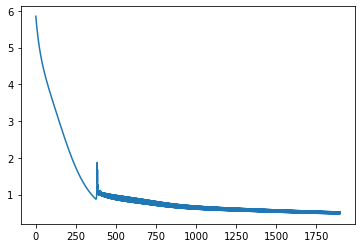

In [239]:
X_train, y_train = torch.tensor(X).float() , torch.tensor(y).float() 

gong = nn.Sequential(
          nn.Linear(4,20),
          nn.Sigmoid(),
          nn.Linear(20,20),
          nn.Sigmoid(),
          nn.Linear(20,1),
          nn.ReLU()
        )

gong(X_train).shape

# 开始训练
epochs = 2000
costs = []
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(gong.parameters(), lr=1e-2)

for epoch in range(epochs):
    
    # 前向传播和计算损失
    out = gong(X_train)
    loss = criterion(out, y_train)
    costs.append(loss.item())
    # 反向传播和参数更新
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 200 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:])

## 用 RNN 来学习


基本思路是一个时间序列来学习网络的初始参数 $h_0$ 学习账期的性质, 另外一个网络来学习时间的变化。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/tie/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [54]:
# 获得数据

nlags = 5

def get_data():
    vintage = pd.read_csv('./vintage-预授信.csv',dtype={'pay_month':'object'},nrows=33)
    sample = vintage[(vintage.pay_month>='201712')& (vintage.pay_month<='201906')].iloc[:,:14]
    sample.index = sample.pay_month
    sample.drop('pay_month',axis=1,inplace=True)
    gdat = sample.copy()
    for i in range(19):
        for j in range(13):
            if i + j >=19:
                gdat.iloc[i,j] = np.nan
    print(gdat.shape) 
    return gdat

gdat = get_data()

# 构建训练集合和测试集合
def makeXy(dat, nb_timesteps):
    m, n = dat.shape
    X, y = [], []
    for i in range(m-nb_timesteps):
        for j in range(n):
            if i + j < 19 - nlags:
                X.append(list(dat.iloc[i:i+5, j]))
                y.append(dat.iloc[i+5, j])
    X, y = np.array(X), np.array(y)
    return X, y

X, y = makeXy(gdat, nlags)
print('Shape of data arrays:', X.shape, y.shape)
m, n = gdat.shape

(19, 13)
Shape of data arrays: (104, 5) (104,)


### 只看某一列数据

In [62]:
col_k = np.array(gdat.iloc[:, k])
col_k

array([4.11390e-05, 3.52690e-05, 3.98650e-05, 2.17400e-05, 4.21380e-05,
       2.51100e-05, 4.14420e-05, 4.98970e-05, 2.91400e-05, 5.10420e-05,
       4.29080e-05, 6.91120e-05, 4.87640e-05, 7.85050e-05, 6.40580e-05,
       6.83250e-05, 7.60900e-05, 7.80840e-05, 1.00232e-04])

(19, 13)
Shape of data arrays: (14, 5) (14,)


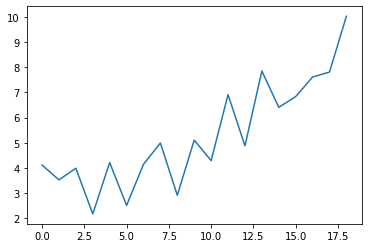

In [108]:
# 获得数据
# season = pd.Series([0.1 * i + np.sin(0.2 * i) + 0.3 * np.random.randn(1).item() for i in range(150)])
gdat = get_data()
k = 0
col_k = pd.Series(gdat.iloc[:, k].to_numpy()) * 100000 # 取出一列进行预测
plt.plot(col_k)

# 构建训练集合和测试集合
def makeXy(ts, nb_timesteps):
    X, y = [], []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

nlags = 5
X, y = makeXy(col_k, nlags)
print('Shape of data arrays:', X.shape, y.shape)

# 划分训练集和测试集，70% 作为训练集
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [109]:
X_train = X_train.reshape(-1, 1, nlags)
y_train = y_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, nlags)

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()

X_train.shape, y_train.shape, X_test.shape

(torch.Size([9, 1, 5]), torch.Size([9, 1, 1]), torch.Size([5, 1, 5]))

In [121]:
# 定义模型
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_reg, self).__init__()
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
        self.reg = nn.Linear(hidden_size, output_size) # 回归
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s * b, h) # 转换成线性层的输入格式
        x = self.reg(x)
        x = x.view(s, b, -1) # (seq, batch, hidden)
        return x

net = lstm_reg(nlags, 2, num_layers=1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)

Epoch: 100, Loss: 1.55555
Epoch: 200, Loss: 1.22582
Epoch: 300, Loss: 1.12304
Epoch: 400, Loss: 1.06039
Epoch: 500, Loss: 1.00861
Epoch: 600, Loss: 0.96029
Epoch: 700, Loss: 0.91236
Epoch: 800, Loss: 0.85960
Epoch: 900, Loss: 0.78858
Epoch: 1000, Loss: 0.64899
Epoch: 1100, Loss: 0.57381
Epoch: 1200, Loss: 0.52891
Epoch: 1300, Loss: 0.48551
Epoch: 1400, Loss: 0.43982
Epoch: 1500, Loss: 0.39511
Epoch: 1600, Loss: 0.34556
Epoch: 1700, Loss: 0.29455
Epoch: 1800, Loss: 0.24797
Epoch: 1900, Loss: 0.20851
Epoch: 2000, Loss: 0.17620


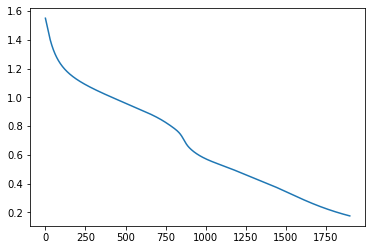

In [122]:
# 开始训练
epochs = 2000
costs = []
for epoch in range(epochs):
    
    # 前向传播和计算损失
    out = net(X_train)
    loss = criterion(out, y_train)
    costs.append(loss.item())
    
    # 反向传播和参数更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:]);

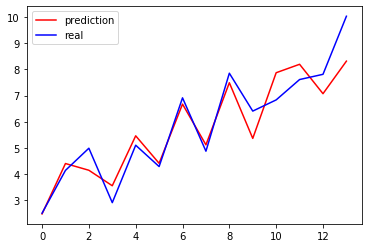

In [123]:
# 模型评估
net = net.eval() # 转换成测试模式
ypred = net(torch.tensor(X.reshape(-1, 1, nlags)).float()) # 测试集的预测结果

# 改变输出的格式
ypred = ypred.view(-1).data.numpy()

# 画出实际结果和预测的结果
plt.plot(ypred, 'r', label='prediction')
plt.plot(y, 'b', label='real')
plt.legend(loc='best');

### 加入帐期参数




如何定制一个账期损失和拟合损失。用替代信息的思想，但是更加问题没有解决，我们是由前面五个数据预测的点。所以我们下一步直接用 5 * 5 的表格来预测下一个数据，当成图像数据来处理！

(19, 13)
Shape of data arrays: (14, 5) (14,)


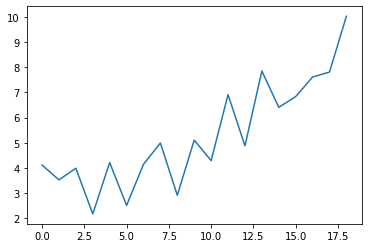

In [153]:
# 获得数据
# season = pd.Series([0.1 * i + np.sin(0.2 * i) + 0.3 * np.random.randn(1).item() for i in range(150)])
gdat = get_data()
k = 0
col_k = pd.Series(gdat.iloc[:, k].to_numpy()) * 100000 # 取出一列进行预测
plt.plot(col_k)

# 构建训练集合和测试集合
def makeXy(ts, nb_timesteps):
    X, y = [], []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

nlags = 5
X, y = makeXy(col_k, nlags)
print('Shape of data arrays:', X.shape, y.shape)

# 划分训练集和测试集，70% 作为训练集
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [154]:
X_train = X_train.reshape(-1, 1, nlags)
y_train = y_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, nlags)

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()

X_train.shape, y_train.shape, X_test.shape

(torch.Size([9, 1, 5]), torch.Size([9, 1, 1]), torch.Size([5, 1, 5]))

In [155]:
g(x).shape

torch.Size([1, 3])

In [181]:
net = lstm_reg(nlags, 2, num_layers=1)
net

lstm_reg(
  (mob): Linear(in_features=2, out_features=13, bias=True)
  (mob2out): Linear(in_features=13, out_features=1, bias=True)
  (mob2reg): Linear(in_features=13, out_features=2, bias=True)
  (rnn): LSTM(5, 2)
  (reg): Linear(in_features=2, out_features=1, bias=True)
)

In [182]:
X_train.shape

torch.Size([9, 1, 5])

In [188]:
[d.shape for d in net(X_train)]

[torch.Size([9, 1, 1]), torch.Size([9, 1])]

Epoch: 200, Loss: 1.22582
Epoch: 400, Loss: 1.29996
Epoch: 600, Loss: 1.18066
Epoch: 800, Loss: 1.10382
Epoch: 1000, Loss: 0.84082
Epoch: 1200, Loss: 0.69155
Epoch: 1400, Loss: 0.59537
Epoch: 1600, Loss: 0.52370
Epoch: 1800, Loss: 0.44668
Epoch: 2000, Loss: 0.33424


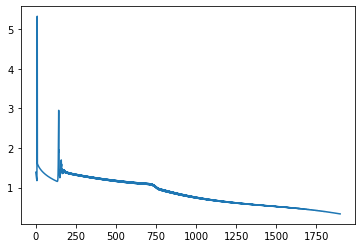

In [189]:
# 定义模型
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_reg, self).__init__()
        self.init = torch.ones((1, hidden_size))
        num_mob_hidden = 13
        self.mob = nn.Linear(hidden_size, num_mob_hidden)
        self.mob2out = nn.Linear(num_mob_hidden, 1)
        self.mob2reg = nn.Linear(num_mob_hidden, hidden_size)
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
        self.reg = nn.Linear(hidden_size, output_size) # 回归
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s * b, h) # 转换成线性层的输入格式
        mob = self.mob(x)
        mob_out = self.mob2out(mob)
        x = self.mob2reg(mob)
        x = self.reg(x)
        x = x.view(s, b, -1) # (seq, batch, hidden)
        return x, mob_out

net = lstm_reg(nlags, 2, num_layers=1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)

# 开始训练
epochs = 2000
costs = []
for epoch in range(epochs):
    
    # 前向传播和计算损失
    out, mob_out = net(X_train)
    mob_train = torch.ones_like(y_train)
    loss = criterion(out, y_train) + criterion(mob_out, mob_train)
    costs.append(loss.item())
    
    # 反向传播和参数更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 200 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:]);

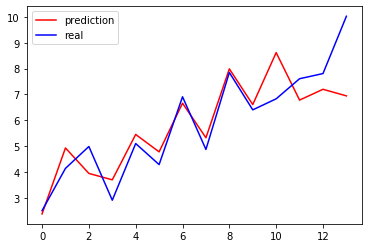

In [190]:
# 模型评估
net = net.eval() # 转换成测试模式
ypred, _ = net(torch.tensor(X.reshape(-1, 1, nlags)).float()) # 测试集的预测结果

# 改变输出的格式
ypred = ypred.view(-1).data.numpy()

# 画出实际结果和预测的结果
plt.plot(ypred, 'r', label='prediction')
plt.plot(y, 'b', label='real')
plt.legend(loc='best');

In [92]:
ls

all.csv       ENZYMES/                              vintage预测-线性.ipynb
Cora/         international-airline-passengers.csv
dat_test.csv  vintage-预授信.csv


### 快速开始

In [10]:
# 定义模型
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=1):
        super(lstm_reg, self).__init__()    
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
        self.reg = nn.Linear(hidden_size, output_size) # 回归
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s * b, h) # 转换成线性层的输入格式
        x = self.reg(x)
        x = x.view(s, b, -1) # (seq, batch, hidden)
        return x
    
nlags = 5
net = lstm_reg(nlags, 40)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)

In [11]:
net

lstm_reg(
  (rnn): LSTM(5, 40)
  (reg): Linear(in_features=40, out_features=1, bias=True)
)

In [12]:
X = torch.randn([101, 1, 5])
X.shape, net(X).shape

(torch.Size([101, 1, 5]), torch.Size([101, 1, 1]))

In [46]:
# 获得数据
nlags = 5
vintage = pd.read_csv('./vintage-预授信.csv',dtype={'pay_month':'object'},nrows=33)
sample = vintage[(vintage.pay_month>='201712')& (vintage.pay_month<='201906')].iloc[:,:14]
sample.index = sample.pay_month
sample.drop('pay_month',axis=1,inplace=True)
gdat = sample.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            gdat.iloc[i,j] = np.nan
print(gdat.shape) 

# 构建训练集合和测试集合
def makeXy(dat, nb_timesteps):
    m, n = dat.shape
    X, y = [], []
    for i in range(m-nb_timesteps):
        for j in range(n):
            if i + j < 19 - nlags:
                X.append(list(dat.iloc[i:i+5, j]))
                y.append(dat.iloc[i+5, j])
    X, y = np.array(X), np.array(y)
    return X, y

X, y = makeXy(gdat, nlags)
print('Shape of data arrays:', X.shape, y.shape)
m, n = gdat.shape

(19, 13)
Shape of data arrays: (104, 5) (104,)


torch.Size([104, 1, 5]) torch.Size([104, 1, 1])
Epoch: 50, Loss: 0.00009
Epoch: 100, Loss: 0.00006
Epoch: 150, Loss: 0.00005
Epoch: 200, Loss: 0.00004


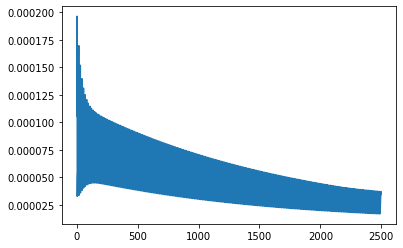

In [47]:
nlags = 5
net = lstm_reg(nlags, 40)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)

# 开始训练
epochs = 200
costs = []
m, n = gdat.shape
X_train, y_train = X.reshape(-1, 1, nlags), y.reshape(-1, 1, 1)
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
print(X_train.shape, y_train.shape)
for epoch in range(epochs):
    i, l = 0, 0
    for k in range(n):
        # 前向传播和计算损失
#         print(i, l) 
        i = m - 5 - k
        l = l + i
#         print(i, l)
#         print(X[l-i:l].shape)
        out = net(X_train[l-i:l])
        loss = criterion(out, y_train[l-i:l])
        costs.append(loss.item())

        # 反向传播和参数更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 50 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:])

In [48]:
# 模型评估
net = net.eval() # 转换成测试模式

ypred = torch.ones(y_train.shape)
i, l = 0, 0
for k in range(n):
    i = m - 5 - k
    l = l + i
    ypred[l-i:l] = net(torch.tensor(X.reshape(-1, 1, nlags))[l-i: l].float()) # 测试集的预测结果

# 改变输出的格式
ypred = ypred.view(-1).data.numpy()

((ypred - y) ** 2).sum()

0.0024718782362029247

In [49]:
# 获得数据
nlags = 5
sample = vintage[(vintage.pay_month>='201712')& (vintage.pay_month<='201906')].iloc[:,:14]
sample.index = sample.pay_month
sample.drop('pay_month',axis=1,inplace=True)
gdat = sample.copy()
for i in range(19):
    for j in range(13):
        if i + j >=19:
            gdat.iloc[i,j] = np.nan
print(gdat.shape) 

# 构建训练集合和测试集合
# 对于任何一列 k 
k = 4
one_col = np.array(gdat.iloc[:, k])
def makeX(dat, nb_timesteps, k):
    m, n = dat.shape
    X, y = [], []
    for i in range(m-nb_timesteps):
        for j in range(n):
            if i + j < 19 - nlags + 1 and j == k:
                X.append(list(dat.iloc[i:i+5, j]))
                y.append(dat.iloc[i+5, j])
    X, y = np.array(X), np.array(y)
    return torch.tensor(X.reshape(-1, 1, nb_timesteps)).float(), y

X_k, y_k = makeX(gdat, nlags, k)
X_k.shape, y_k.shape

(19, 13)


(torch.Size([11, 1, 5]), (11,))

In [50]:
y_k, net(X_k).data.squeeze()

(array([0.0071984 , 0.00751892, 0.00793685, 0.00811131, 0.0080826 ,
        0.00766419, 0.0084885 , 0.00738749, 0.00732648, 0.00795439,
               nan]),
 tensor([-0.0056,  0.0010,  0.0057,  0.0087,  0.0105,  0.0114,  0.0119,  0.0122,
          0.0123,  0.0124,  0.0124]))

## 卷积网络

### 卷积网络方法

直接用最简单的全联接网络或这卷积网络。一个主要的缺点是有部分点不能够用该网络预测，其输入不够。解决思路有两种：

- 补充很多0
- 建立两个模型

In [191]:
ls

all.csv       ENZYMES/                              vintage预测-线性.ipynb
Cora/         international-airline-passengers.csv
dat_test.csv  vintage-预授信.csv


In [35]:
def get_data_conv(k=5):
    dat = pd.read_csv("./dat_test.csv")
    dat = dat.to_numpy()
    n, m = dat.shape
    tmp = np.zeros((n, k))
    return np.concatenate([tmp, dat], axis=1)

d = get_data_conv()

def makeData(d, l=6):
    X, y = [], []
    m, n = d.shape
    for i in range(m-l):
        for j in range(n-l):
            if ~np.isnan(d[i:i+l, j:j+l].sum() ):
                tmp = d[i:i+l, j:j+l]
                yone = tmp[-1, -1]
                tmp[-1, -1] = (tmp[-1, -2] + tmp[-2, -1])/2
                Xone = tmp[np.newaxis, :]
                X.append(Xone)
                y.append(yone)
    return np.array(X), np.array(y)[:, np.newaxis]

X, y = makeData(d)
y.shape, X.shape

((101, 1), (101, 1, 6, 6))

In [36]:
d = get_data_conv()
pd.DataFrame(d)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.000041,0.001239,0.003059,0.004109,0.005035,0.006015,0.006997,0.007861,0.008619,0.009089,0.009336,0.009421,0.009375
1,0.0,0.0,0.0,0.0,0.0,0.000035,0.001423,0.002609,0.003719,0.004887,0.006095,0.007266,0.008235,0.008943,0.009386,0.009569,0.009721,0.009722
2,0.0,0.0,0.0,0.0,0.0,0.000040,0.000942,0.002189,0.003438,0.004855,0.006341,0.007588,0.008511,0.009154,0.009545,0.009854,0.010065,0.010056
3,0.0,0.0,0.0,0.0,0.0,0.000022,0.000945,0.002231,0.003814,0.005521,0.006995,0.008147,0.009015,0.009517,0.009978,0.010350,0.010484,0.010404
4,0.0,0.0,0.0,0.0,0.0,0.000042,0.000910,0.002404,0.004016,0.005542,0.006923,0.007998,0.008600,0.009144,0.009676,0.009935,0.009980,0.009949
5,0.0,0.0,0.0,0.0,0.0,0.000025,0.001279,0.003231,0.005200,0.007198,0.008589,0.009573,0.010468,0.011371,0.011902,0.012116,0.012308,0.012316
6,0.0,0.0,0.0,0.0,0.0,0.000041,0.001680,0.003893,0.005820,0.007519,0.008689,0.009853,0.010878,0.011489,0.011888,0.012204,0.012353,0.012378
7,0.0,0.0,0.0,0.0,0.0,0.000050,0.002142,0.004545,0.006497,0.007937,0.009481,0.010921,0.011841,0.012324,0.012897,0.013269,0.013455,NaN
8,0.0,0.0,0.0,0.0,0.0,0.000029,0.002134,0.004521,0.006156,0.008111,0.009971,0.011177,0.011943,0.012774,0.013364,0.013758,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.000051,0.001870,0.003677,0.005853,0.008083,0.009680,0.010715,0.011879,0.012714,0.013381,NaN,NaN,NaN


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(30, 60, kernel_size=5, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(60, 10)
        self.fc2 = nn.Linear(10, 1)
    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         print(x.shape)
        n = x.shape[0]
        x = x.view(n, -1)
        x = torch.sigmoid(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = torch.relu(self.fc2(x))
        return x
g = Net()
X = torch.randn((101, 1, 6, 6))
g(X).shape

torch.Size([101, 1])

Epoch: 200, Loss: 19.58513
Epoch: 400, Loss: 9.46929
Epoch: 600, Loss: 8.31733
Epoch: 800, Loss: 6.47139
Epoch: 1000, Loss: 6.78150
Epoch: 1200, Loss: 5.28408
Epoch: 1400, Loss: 5.22651
Epoch: 1600, Loss: 4.95747
Epoch: 1800, Loss: 4.52280
Epoch: 2000, Loss: 4.69904


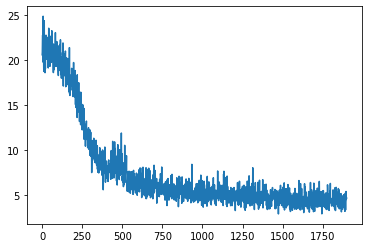

In [33]:
g = Net()


# 开始训练
epochs = 2000
costs = []
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(g.parameters(), lr=1e-2)


X_train, y_train = torch.tensor(X).float() * 1000, torch.tensor(y).float() * 1000

for epoch in range(epochs):
    
    # 前向传播和计算损失
    out = g(X_train)
    loss = criterion(out, y_train)
    costs.append(loss.item())
    # 反向传播和参数更新
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 200 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:]);

Epoch: 100, Loss: 22.31629
Epoch: 200, Loss: 18.45989
Epoch: 300, Loss: 15.03046
Epoch: 400, Loss: 9.52282
Epoch: 500, Loss: 6.70326
Epoch: 600, Loss: 6.91087
Epoch: 700, Loss: 5.62750
Epoch: 800, Loss: 5.53450
Epoch: 900, Loss: 5.72471
Epoch: 1000, Loss: 5.24504
Epoch: 1100, Loss: 4.36575
Epoch: 1200, Loss: 4.40725
Epoch: 1300, Loss: 4.42089
Epoch: 1400, Loss: 4.71884
Epoch: 1500, Loss: 5.66014
Epoch: 1600, Loss: 4.75692
Epoch: 1700, Loss: 4.37289
Epoch: 1800, Loss: 4.23240
Epoch: 1900, Loss: 4.89434
Epoch: 2000, Loss: 5.38769


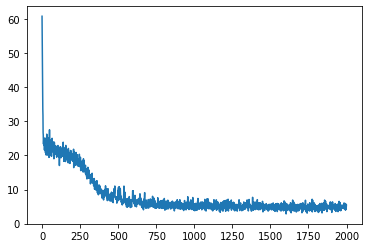

In [34]:
# ----------------
# 手写实现开始训练
g = Net()
epochs = 2000
costs = []
lr = 1e-2

X_train, y_train = torch.tensor(X).float() * 1000, torch.tensor(y).float() * 1000

for epoch in range(epochs):
    
    # 前向传播和计算损失
    out = g(X_train)
    loss = ((out - y_train) ** 2).mean()
    costs.append(loss.item())
    # 反向传播和参数更新
    loss.backward()
    for w in g.parameters():
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
        
#     optimizer.step()
    if (epoch + 1) % 100 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[:]);

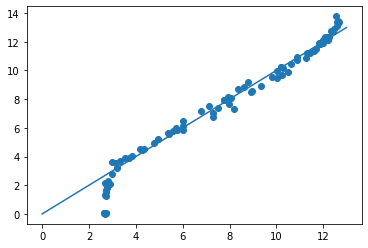

In [35]:
# 模型评估
net = g.eval() # 转换成测试模式
ypred = g(X_train) # 测试集的预测结果



# # 改变输出的格式
# ypred = ypred.view(-1).data.numpy()

# # 画出实际结果和预测的结果
# plt.plot(ypred, 'r', label='prediction')
# plt.plot(season, 'b', label='real')
# plt.legend(loc='best');

plt.scatter(ypred.data.numpy(), y_train.data.numpy())
line = [i/100 for i in range(100 * 13)]
plt.plot(line, line)

### 最终卷积网络模型

发现卷积网络并不适合次问题。

In [129]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def get_data_conv(k=5):
    dat = pd.read_csv("./dat_test.csv")
    dat = dat.to_numpy()
    n, m = dat.shape
    tmp = np.zeros((n, k))
    return np.concatenate([tmp, dat], axis=1)

d = get_data_conv()
sample = pd.read_csv("./sample_test.csv")
train = pd.read_csv("./dat_test.csv")

def makeData(d, l=6):
    X, y = [], []
    m, n = d.shape
    for i in range(m-l):
        for j in range(n-l):
            if ~np.isnan(d[i:i+l, j:j+l].sum() ):
                tmp = d[i:i+l, j:j+l]
                yone = tmp[-1, -1]
                tmp[-1, -1] = tmp[-2, -1]
                Xone = tmp[np.newaxis, :]
                X.append(Xone)
                y.append(yone)
    return np.array(X), np.array(y)[:, np.newaxis]

X, y = makeData(d)
y.shape, X.shape

((101, 1), (101, 1, 6, 6))

建立模型预测

Epoch: 200, Loss: 20.08966
Epoch: 400, Loss: 10.34938
Epoch: 600, Loss: 6.15881
Epoch: 800, Loss: 5.94756
Epoch: 1000, Loss: 5.26497
Epoch: 1200, Loss: 4.42289
Epoch: 1400, Loss: 4.77001
Epoch: 1600, Loss: 4.62726
Epoch: 1800, Loss: 4.55740
Epoch: 2000, Loss: 5.61446


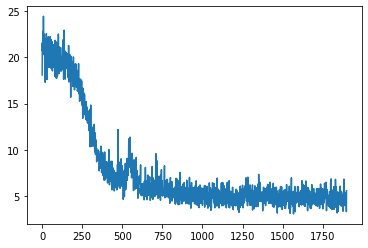

In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(30, 60, kernel_size=5, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(60, 10)
        self.fc11 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 1)
    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         print(x.shape)
        n = x.shape[0]
        x = x.view(n, -1)
        x = torch.sigmoid(self.fc1(x))
#         x = torch.relu(self.fc11(x))    
        x = F.dropout(x, training=self.training)
        x = torch.relu(self.fc2(x))
        return x
g = Net()
X = torch.randn((101, 1, 6, 6))
g(X).shape

g = Net()

# 开始训练
epochs = 2000
costs = []
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(g.parameters(), lr=1e-2)


X_train, y_train = torch.tensor(X).float() * 1000.0, torch.tensor(y).float() * 1000

for epoch in range(epochs):
    
    # 前向传播和计算损失
    out = g(X_train)
    loss = criterion(out, y_train)
    costs.append(loss.item())
    # 反向传播和参数更新
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 200 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(epoch + 1, loss.data.item()))
        
plt.plot(costs[100:]);

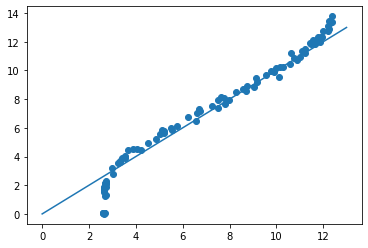

In [131]:
# 模型评估
net = g.eval() # 转换成测试模式
ypred = g(X_train) # 测试集的预测结果
plt.scatter(ypred.data.numpy(), y_train.data.numpy())
line = [i/100 for i in range(100 * 13)]
plt.plot(line, line)

In [132]:
def padding(train, i=0, j=0):
    # 返回的是预测某个（i，j） 的输入 l * l 表格
    d = np.array(train) * 1000.0
    l = 6
    X = np.ones((l, l))
    for s in range(l):
        for t in range(l):
            a = l - s - 1
            b = l - t - 1           
            if a==0 and b==0:
                X[s, t] = X[s-1, t]
            elif i - a >= 0 and j - b >= 0:
                X[s, t] = d[i - a, j - b]
            else:
                X[s, t] = 0.0
    out = torch.tensor(X).float()
    out = out.unsqueeze(0).unsqueeze(0)
    return out
padding(train, 2, 2)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0411, 1.2394, 3.0586],
          [0.0000, 0.0000, 0.0000, 0.0353, 1.4232, 2.6088],
          [0.0000, 0.0000, 0.0000, 0.0399, 0.9423, 2.6088]]]])

In [133]:
def gong_pred_one(g, train, i, j):
    X = padding(train, i, j)
    out = g(X)
    return out.item()
gong_pred_one(g, train, 1, 1)

5.451396465301514

In [135]:
def gong_pred_all(g, train):
    n, m = train.shape
    out = train.copy() * 1000.0
    for i in range(1, n):
        for j in range(1, m):
            a = np.isnan(out.iloc[i, j])
            b, c = ~np.isnan(out.iloc[i-1, j]), ~np.isnan(out.iloc[i, j-1])
#             print(a, b, c)
            if a and b and c:
                out.iloc[i, j] = gong_pred_one(g, train, i, j)
    return out
gong_pred_all(g, train)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.041139,1.239370,3.058608,4.108649,5.034821,6.015498,6.996884,7.860544,8.618933,9.089184,9.335938,9.420626,9.374633
1,0.035269,1.423235,2.608823,3.718765,4.887114,6.095108,7.265622,8.234606,8.942849,9.385740,9.568951,9.720926,9.722293
2,0.039865,0.942250,2.188765,3.438074,4.854885,6.340638,7.587814,8.510909,9.153874,9.544606,9.853834,10.064600,10.055685
3,0.021740,0.944945,2.230733,3.813669,5.520946,6.994969,8.146654,9.015467,9.517217,9.977618,10.350069,10.483790,10.404041
4,0.042138,0.910275,2.404229,4.016152,5.542057,6.922588,7.997780,8.600242,9.143697,9.676023,9.934742,9.979661,9.949383
5,0.025110,1.279248,3.231270,5.199816,7.198403,8.589069,9.572956,10.468255,11.370864,11.901949,12.115779,12.308158,12.315864
6,0.041442,1.680022,3.893160,5.820071,7.518916,8.689222,9.853277,10.877931,11.488572,11.887784,12.203776,12.352752,12.378468
7,0.049897,2.142415,4.545138,6.496654,7.936851,9.481351,10.921342,11.840623,12.323732,12.896868,13.269295,13.455253,4.156507
8,0.029140,2.134176,4.520976,6.155907,8.111306,9.971080,11.177443,11.942733,12.773502,13.364321,13.757772,4.019889,NaN
9,0.051042,1.870345,3.677285,5.852535,8.082597,9.679922,10.714619,11.879234,12.713996,13.381333,3.938580,NaN,NaN


In [136]:
sample * 1000

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.041139,1.239370,3.058608,4.108649,5.034821,6.015498,6.996884,7.860544,8.618933,9.089184,9.335938,9.420626,9.374633
1,0.035269,1.423235,2.608823,3.718765,4.887114,6.095108,7.265622,8.234606,8.942849,9.385740,9.568951,9.720926,9.722293
2,0.039865,0.942250,2.188765,3.438074,4.854885,6.340638,7.587814,8.510909,9.153874,9.544606,9.853834,10.064600,10.055685
3,0.021740,0.944945,2.230733,3.813669,5.520946,6.994969,8.146654,9.015467,9.517217,9.977618,10.350069,10.483790,10.404041
4,0.042138,0.910275,2.404229,4.016152,5.542057,6.922588,7.997780,8.600242,9.143697,9.676023,9.934742,9.979661,9.949383
5,0.025110,1.279248,3.231270,5.199816,7.198403,8.589069,9.572956,10.468255,11.370864,11.901949,12.115779,12.308158,12.315864
6,0.041442,1.680022,3.893160,5.820071,7.518916,8.689222,9.853277,10.877931,11.488572,11.887784,12.203776,12.352752,12.378468
7,0.049897,2.142415,4.545138,6.496654,7.936851,9.481351,10.921342,11.840623,12.323732,12.896868,13.269295,13.455253,13.441406
8,0.029140,2.134176,4.520976,6.155907,8.111306,9.971080,11.177443,11.942733,12.773502,13.364321,13.757772,13.924599,14.004859
9,0.051042,1.870345,3.677285,5.852535,8.082597,9.679922,10.714619,11.879234,12.713996,13.381333,13.829254,14.192765,14.387916


In [ ]:
train * 1000

## 自定义网络

### 定制网络

定制网络实现离得越近，权重越高。

In [140]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def get_data_conv(k=5):
    dat = pd.read_csv("./dat_test.csv")
    dat = dat.to_numpy()
    n, m = dat.shape
    tmp = np.zeros((n, k))
    return np.concatenate([tmp, dat], axis=1)

d = get_data_conv()
sample = pd.read_csv("./sample_test.csv")
train = pd.read_csv("./dat_test.csv")

def makeData(d, l=6):
    X, y = [], []
    
    m, n = d.shape
    for i in range(m-l):
        for j in range(n-l):
            if ~np.isnan(d[i:i+l, j:j+l].sum() ):
                tmp = d[i:i+l, j:j+l]
                yone = tmp[-1, -1]
                tmp[-1, -1] = tmp[-2, -1]
                Xone = tmp
                X.append(Xone)
                y.append(yone)
                
    return np.array(X), np.array(y)[:, np.newaxis]
X, y = makeData(d)
y.shape, X.shape

((101, 1), (101, 6, 6))

来一个简单的线性模型

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l = 6
        self.weight = nn.Parameter(torch.randn(l, l))
    def forward(self, x):
        return x
g = Net()
X = torch.randn((101, 1, 6, 6))
g(X).shape